### Regression as machine learing

In [30]:
!pip install ase
!git clone https://github.com/icomse/5th_workshop_MachineLearning.git
import os
os.chdir('5th_workshop_MachineLearning/data')
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 24.5 MB/s eta 0:00:00


In [2]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
# the names in sklearn tend to be pretty long, so we will import the individual
# objects rather than the whole thing

### Let's read in some data

This is some artificial data we will be playing around with to illustrate some important concepts.

In [3]:
dlin = pd.read_csv('linmod.csv')

What does this data look like? Inspect directly and plot.

In [4]:
dlin.head()

,inputs,outputs
0,8.894,16.107
1,8.691,16.509
2,11.080,16.941
3,16.344,17.382
4,13.662,17.831


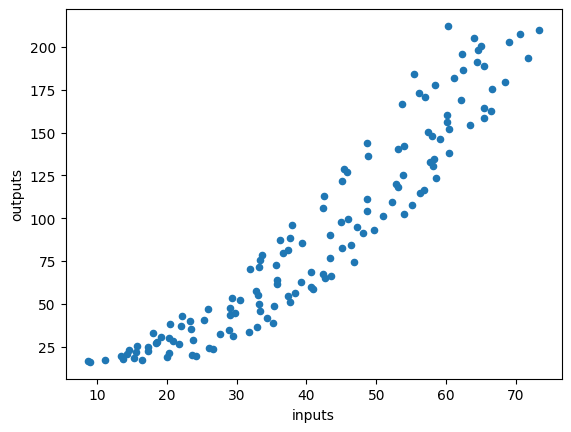

In [5]:
dlin.plot(x='inputs',y='outputs',kind='scatter')
plt.show()

Now, let's train a linear model with the data! First, create the model. It starts out as just an empty object, that we need to fill.

In [6]:
linmodel = LinearRegression()

Now look up the documentation as to what to do to fit the model. When you fit it, what do you get back? NOTE: `LinearRegression` expects that that the input X is a 2D arrray, of size `[n_features, n_samples]`, because it is designed to handle the general case that you are doing multiple variable linear regression. So if you pass in a 1D array, it will error. Read the error message you get carefully for a quick fix.

In [7]:
X = dlin['inputs'].values.reshape(-1, 1)
Y = dlin['outputs']
linmodel.fit(X,Y)

LinearRegression()

OK, you have a model. We next want to plot the prediction of the model and the points on the same plot?

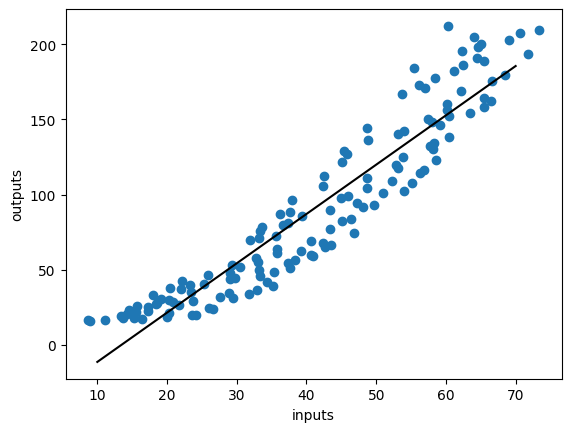

In [8]:
xvals = np.linspace(10,70,100)
ypred = linmodel.predict(xvals.reshape(-1,1))  # use this to apply the model
plt.plot(xvals,ypred,c='k')
plt.scatter(X,Y)
plt.xlabel('inputs')
plt.ylabel('outputs')
plt.show()

What methods does the `LinearRegression` have? What information can you get from it?  What are the parameters of a 1D linear regression?  What is a measure of how good the model is?

In [9]:
linmodel?

In [10]:
print(linmodel.intercept_)
print(linmodel.coef_)
print(linmodel.score(X,Y))  # in this case, the score gives the R^2.

-43.99275057150059
[3.27921449]
0.8875612848546925


Let's play around with (over)fitting!  There's a little bit of curvature - in the data; maybe we should try a polynomial fit?

Let's actually just use a sample of the data set to train; we want to go up to the number of data points, and polynomial regression is numerically unstable with large numbers.

In [11]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3)

We make a polynomial fit using sklearn by taking powers of the input features.  `scikit-learn` has a function for this.

In [12]:
from sklearn.preprocessing import PolynomialFeatures

To use it, you create a `PolynomialFeatures` object of the degree you are interested in, then take the powers of the data using the fit_transform method of `PolynomialFeatures`. See example (you will have to supply your own X, which is the same input as `LinearRegression.fit` takes.

In [13]:
pf = PolynomialFeatures(degree=2)
pX_train = pf.fit_transform(X_train)

In [14]:
print(X_train[:5])
print(pX_train[:5])

[[65.048]
 [48.728]
 [23.305]
 [53.092]
 [58.498]]
[[1.00000000e+00 6.50480000e+01 4.23124230e+03]
 [1.00000000e+00 4.87280000e+01 2.37441798e+03]
 [1.00000000e+00 2.33050000e+01 5.43123025e+02]
 [1.00000000e+00 5.30920000e+01 2.81876046e+03]
 [1.00000000e+00 5.84980000e+01 3.42201600e+03]]


it's a degree $\times$ n_data array; with each column the input data to power $n$.

Now, lets see how the model fits the data.  Inspect the model parameters and the $R^2$, and plot the fit and the curve.

In [15]:
linmodel.fit(pX_train,Y_train)
print(linmodel.intercept_)
print(linmodel.coef_)
print('R^2 (train) =', linmodel.score(pX_train,Y_train))

1.991378967575372
[0.         0.56556314 0.03370315]
R^2 (train) = 0.9080865049519977


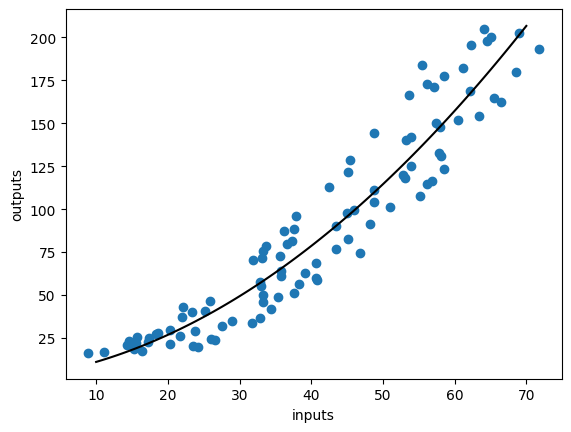

In [16]:
xvals = np.linspace(10,70,100)
px = pf.fit_transform(xvals.reshape(-1,1))
ypredict = linmodel.predict(px)
plt.plot(xvals,ypredict,c='k')
plt.scatter(X_train,Y_train)
plt.xlabel('inputs')
plt.ylabel('outputs')
plt.show()

Now test the model on the test set.

R^2 = 0.9249117198970046


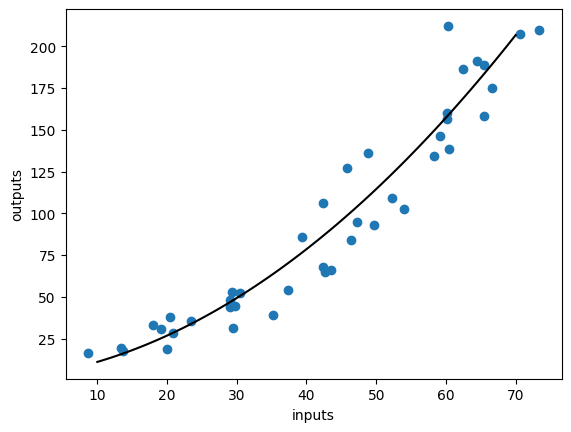

In [17]:
pX = pf.fit_transform(X_test)
plt.plot(xvals,ypredict,c='k')
plt.scatter(X_test,Y_test)
plt.xlabel('inputs')
plt.ylabel('outputs')
print('R^2 =', linmodel.score(pX,Y_test))

Remember, it's the TESTING MSE (or $R^2$) that we want to minimize, not the training MSE.  If the training MSE is low, but the testing is high, then the model is overfit.  

**HACKING TIME**: Now, go back and try a higher polynomial degree. Note that polynomial fitting is not very numerically stable, so if you fit to too many points, then you start to have problems.  What problems do you have?

Can you plot $R^2$ (i.e. linmodel.score) for the test and training set versus polynomial degree?  What do you see?

R^2 (train) = 0.9117674627243452
R^2 (test) = 0.9256400920887065


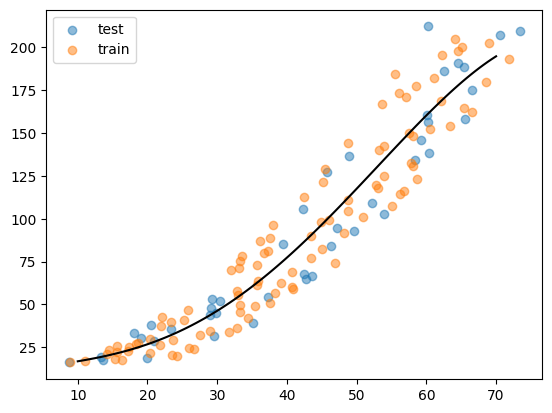

In [18]:
pf = PolynomialFeatures(degree=4)
pX_train = pf.fit_transform(X_train) # transform the features into a x^0 . . . x^15
linmodel.fit(pX_train,Y_train) # train the model on the data
print('R^2 (train) =', linmodel.score(pX_train,Y_train))
pxvals = pf.fit_transform(xvals.reshape(-1,1)) # generate the polynomial input data
ypredict = linmodel.predict(pxvals) # predict the curve of the model.
plt.plot(xvals,ypredict,c='k')
plt.scatter(X_test,Y_test,label='test',alpha=0.5)
plt.scatter(X_train,Y_train,label='train',alpha=0.5)
plt.legend()
pX_test = pf.fit_transform(X_test)  # what is the transformed test data, so we can compute the score
print('R^2 (test) =', linmodel.score(pX_test,Y_test)) # how well does the test data fit?

In [19]:
R2test = list()
R2train = list()
ps = list()
for p in range(2,20):
    pf = PolynomialFeatures(degree=p)
    pX_train = pf.fit_transform(X_train)
    linmodel.fit(pX_train,Y_train)
    R2train.append(linmodel.score(pX_train,Y_train))
    pxvals = pf.fit_transform(xvals.reshape(-1,1)) # generate the polynomial input data
    ypredict = linmodel.predict(pxvals)
    pX_test = pf.fit_transform(X_test)
    R2test.append(linmodel.score(pX_test,Y_test))
    ps.append(p)

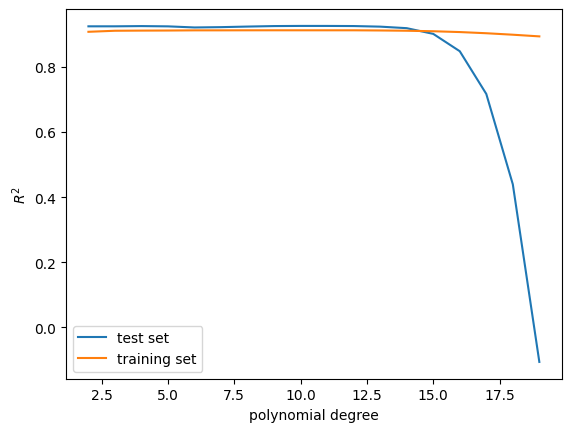

In [20]:
plt.plot(ps,R2test,label='test set')
plt.plot(ps,R2train,label='training set')
plt.xlabel('polynomial degree')
plt.ylabel('$R^2$')
plt.legend()
plt.show()

Generally the training set will get a bit better as the model gets more complex, whereas the test model gets worse as the trained model starts to overfit.